# Handwritten digits classification using neural network¶

In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

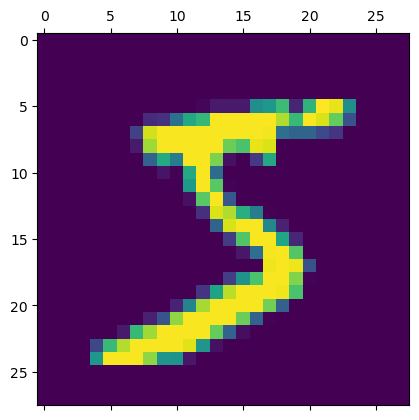

In [8]:
plt.matshow(x_train[0])

In [9]:
y_train[0]

5

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [13]:
x_train_flattened.shape

(60000, 784)

In [18]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 705us/step - loss: 0.4730 - accuracy: 0.8747
Epoch 2/5
1875/1875 [==============================] - 1s 637us/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 634us/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 651us/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 645us/step - loss: 0.2664 - accuracy: 0.9260


In [16]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9261


[0.26724061369895935, 0.9261000156402588]

In [19]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

313/313 [==============================] - 0s 545us/step


[7, 2, 1, 0, 4]

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    3,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   6,    7,  938,   11,    8,    1,   13,   11,   35,    2],
       [   6,    0,   23,  907,    0,   25,    3,   14,   25,    7],
       [   1,    1,    4,    1,  909,    0,   12,    5,   10,   39],
       [  12,    3,    7,   28,   11,  762,   19,    9,   33,    8],
       [  11,    3,    8,    1,    7,    6,  917,    2,    3,    0],
       [   1,    5,   24,    3,    5,    0,    0,  967,    2,   21],
       [  10,    7,    7,   17,    9,   21,   10,   13,  871,    9],
       [  11,    6,    2,    9,   24,    5,    0,   33,    5,  914]])>

Text(95.72222222222221, 0.5, 'Truth')

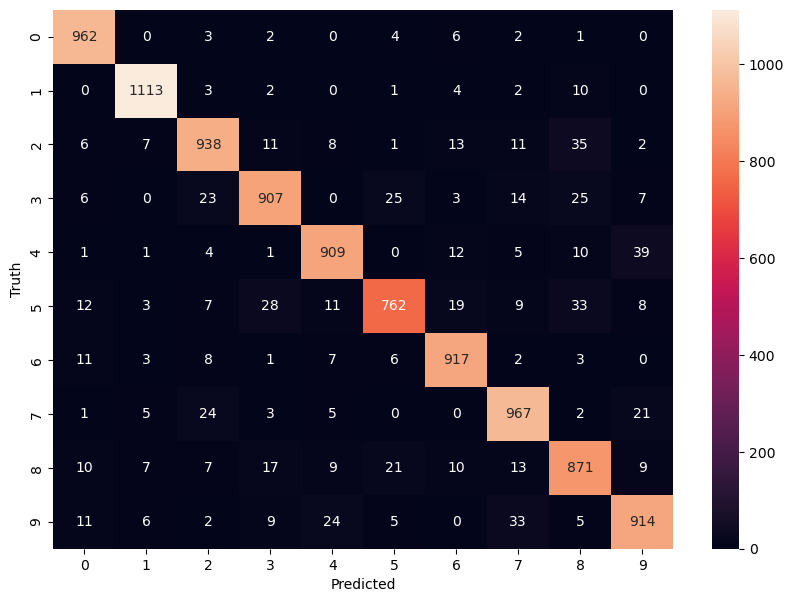

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
     keras.layers.Dense(35, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2616 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 2s 990us/step - loss: 0.1119 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0829 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0647 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0529 - accuracy: 0.9829


In [40]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 750us/step - loss: 0.0879 - accuracy: 0.9749


[0.08787816017866135, 0.9749000072479248]

313/313 [==============================] - 0s 697us/step


Text(95.72222222222221, 0.5, 'Truth')

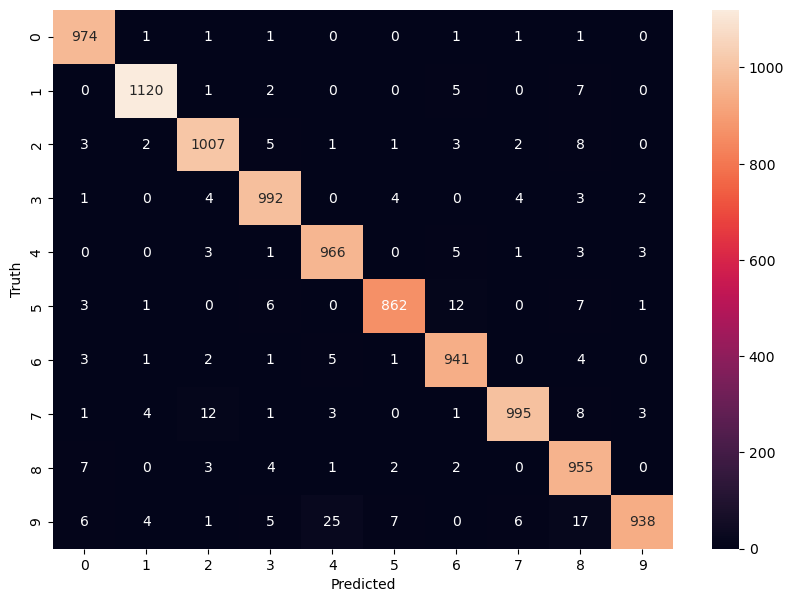

In [41]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

313/313 [==============================] - 0s 711us/step


[7, 2, 1, 0, 4]

In [51]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [52]:
y_predicted_labels[7]

9

In [53]:
y_test[7]

9

In [54]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 716us/step - loss: 0.0879 - accuracy: 0.9749


[0.08787816017866135, 0.9749000072479248]